Fitting 3 folds for each of 18 candidates, totalling 54 fits


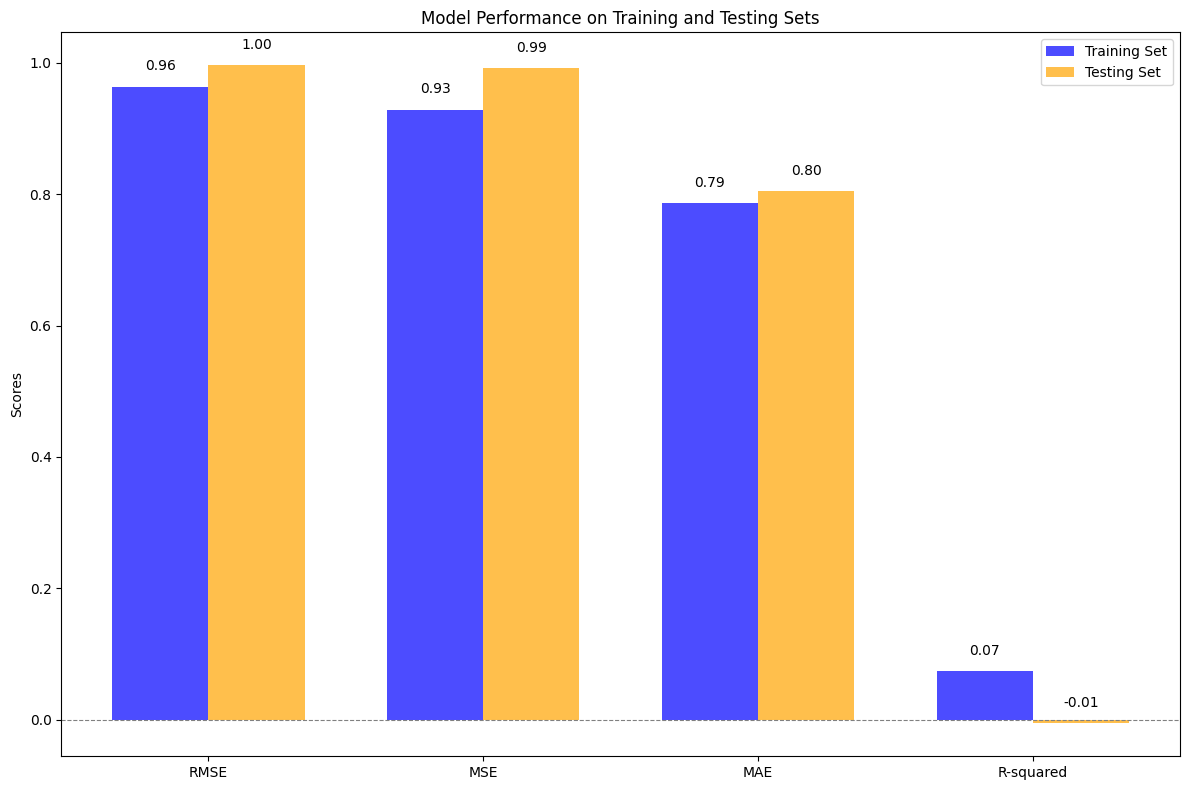

      Metric  Training Set  Testing Set
0       RMSE      0.963719     0.996294
1        MSE      0.928755     0.992602
2        MAE      0.786625     0.804630
3  R-squared      0.073516    -0.005621


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Processed_Fashion_Retail_Sales.csv'
data = pd.read_csv(file_path)

# Select features and target
features = ['Year', 'Month', 'Weekday', 'Item Purchased Encoded', 'Review Rating', 'Payment Method Encoded']
target = 'Standardized Purchase Amount (USD)'
X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Predictions and evaluation for the training set
y_train_pred = best_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Predictions and evaluation for the testing set
y_test_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create a table for metrics
results_df = pd.DataFrame({
    "Metric": ["RMSE", "MSE", "MAE", "R-squared"],
    "Training Set": [train_rmse, train_rmse**2, train_mae, train_r2],
    "Testing Set": [test_rmse, test_rmse**2, test_mae, test_r2]
})

# Visualize the results as a bar chart
metrics = ["RMSE", "MSE", "MAE", "R-squared"]
train_values = results_df["Training Set"].tolist()
test_values = results_df["Testing Set"].tolist()

# Bar positions
x = np.arange(len(metrics))
width = 0.35  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bar chart
ax.bar(x - width/2, train_values, width, label='Training Set', color='blue', alpha=0.7)
ax.bar(x + width/2, test_values, width, label='Testing Set', color='orange', alpha=0.7)

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Model Performance on Training and Testing Sets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.legend()

# Add data labels to the bars
for i in range(len(metrics)):
    ax.text(x[i] - width/2, train_values[i] + 0.02, f'{train_values[i]:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(x[i] + width/2, test_values[i] + 0.02, f'{test_values[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Display the results dataframe
print(results_df)
